<a href="https://colab.research.google.com/gist/SarahMit/0f8cf3a220519b6ea234f330b9157dea/medvis22_exercisesheet05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Sheet 05
Direct Volume Rendering 2


---

# Preparation

Here we load the libraries needed for the excercise. You should run this section but you do not have to change it.

In [1]:
#!pip install scipy
#!pip install pydicom
#!pip install ipyvolume
#!pip install ipympl
#!pip install matplotlib==3.1.3
#!pip install trimesh
#!pip install image

import image
import math

import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter

#import ipyvolume as ipv

#import pydicom #for working with DICOM files
import os # for file-handling
import numpy as np # maths
import matplotlib.pyplot as plt # plotting
#import ipympl
from scipy import ndimage # image processing
from pydicom import dcmread # reading DICOM files

Here we clone a subfolder from a git needed for the excercise. You should run this section but you do not have to change it.

In [2]:
x, y = np.meshgrid(np.linspace(-1,1,256), np.linspace(-1,1,256))
dst = np.sqrt(x*x+y*y)
 
# Initializing sigma and muu
sigma = 1
muu = 0.000
 
# Calculating Gaussian array
gauss_img = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )

#plt.imshow(gauss_img)



# load one slice
dcm_slice = dcmread("Data/DICOM_Brain/brain_011.dcm")
# convert it to numpy array for plotting the image
dcm_img = np.array(dcm_slice.pixel_array)


# quiver function

def compute_gradients(p, normalized):
  w,h = p.shape
  x, y = np.mgrid[:h:16, :w:16]

  dy, dx = np.gradient(p)

  a = np.array([dx.flatten(), dy.flatten()])
  for i in range(a.shape[1]):
    xv = a[0, i]
    yv = a[1, i]
    if(normalized):
      if abs(xv) > 0 or abs(yv) > 0:
        a[:, i] /= math.sqrt(xv**2 + yv**2)

  dx = a[0,:].reshape((256, 256))
  dy = a[1,:].reshape((256, 256))

  tx = dx[::16, ::16]
  ty = dy[::16, ::16]
  return x, y, tx, ty


  # color map function

def threshold_filtering(threshold, tx, ty, color1 = "c", color2 = "r"):
  test = np.sqrt((tx**2)+(ty**2)) > threshold
  c = np.chararray((16, 16))
  c[test] = color1
  c[np.logical_not(test)] = color2
  return c




#fig, ax = plt.subplots(figsize=(15,15))
#im = ax.imshow(dcm_img, extent=[x2.min(), x2.max(), y2.min(), y2.max()], cmap="gray")
#plt.colorbar(im)
#ax.quiver(x2, y2, tx2.T, ty2.T, minlength=1, color=[x.decode("utf-8") for x in c.T.flatten()])

#ax.set(aspect=1, title='Quiver Plot')
#plt.show()

# Task 01: Gradients

**(a)** What is a gradient?

**(b)** For applying *Phong shading* surface normal vectors are required. Since they are not available in volume data: what can be used instead and why is it feasible?

**(c)** How can you improve the quality of gradient-based shading?

----

### (a)
* Vector consisting of the partial derivative in the X-,Y- and Z-direction 
* gradient has a magnitude which is the length of the gradient
* magnitude indicates degree of change
* gradient calculated with the central difference, e.g. of the 6 adjacent voxels

### (b)
* use gradients instead
* normals are orthogonal to the surface
* gradients are orthogonal to the direction of change as well

### (c)
* using on-the-fly calculated gradients, interpolated values are used 

# Task 02: Plot Gradients

Below youn can see different images as well as their gradients (depicted as arrows). The first image is a 2D gaussian function, the others are a slice from our MRI brain data set. Because plotting all the gradients would cause very crowded images, we only depict gradients at some sample points of the image. The sample points are the starting points of each arrow. Scince the medical images are noisy their gradients look very messed up. Don't be confused by that.

**(a)** The length of a gradient is called magnitude. What does it mean if a gradient has a high magnitude (long arrow) or low magnitude (short arrow)?

**(b)** Due to noise in the dicom image there are a lot of gradients with higher magnitudes in regions that look homogenous for the human eye. Choose a threshold to filter small gradients in the image (gradients under the threshold will become red).

**(c)** Smooth the image `dcm_img` and see what happens. You can use the smoothing methods from Exercise Sheet 02. Call your smoothed image `smoothed_img`, so it will be plotted at the correct position in the subfigure.

*Optional: You can try out different filtering methods, e.g. median filter and gaussian smoothing.*

----

### (a)
* then the difference between two voxels is very high, this could be a transitional area where the material changes


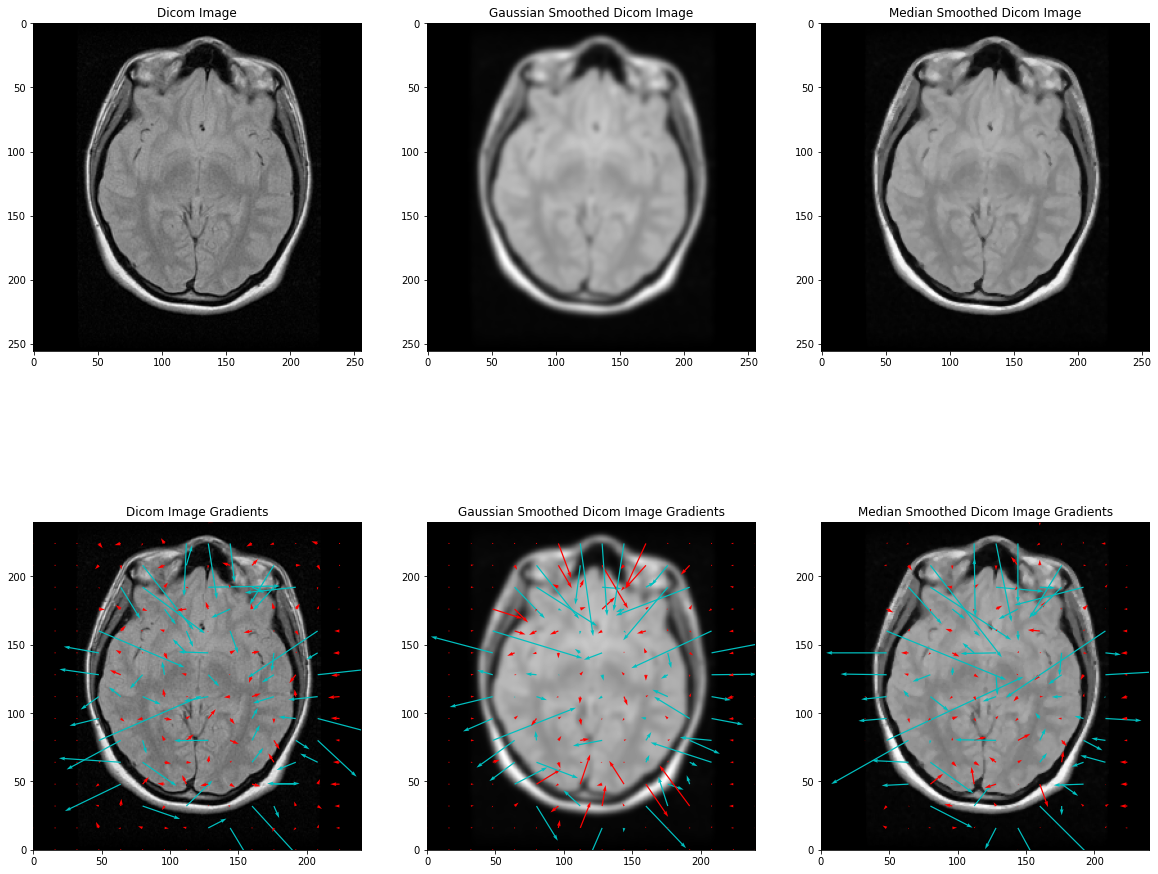

In [6]:
# Compute Gradients for Gaussian Image
x1, y1, tx1, ty1 = compute_gradients(gauss_img, False)

# Compute Gradients for Dicom Image
x2, y2, tx2, ty2 = compute_gradients(dcm_img, False)

##########################################################
# (b) Choose a threshold value to filter small gradients.
##########################################################
treshold = 25 #0
c = threshold_filtering(treshold, tx2, ty2)

###############################################################################
# (c) Smooth the image dcm_img with a filter of your choice. You can copy code
# from exercise sheet 02. Call the filtered image smoothed_img.
###############################################################################

smoothed_img = ndimage.gaussian_filter(dcm_img, sigma=2) #dcm_img # smooth the dcm_image here
median_smoothed_img = ndimage.median_filter(dcm_img, size=3)

# Compute Gradients for Smoothed Dicom Image
x3, y3, tx3, ty3 = compute_gradients(smoothed_img, False)
x4, y4, tx4, ty4 = compute_gradients(median_smoothed_img, False)



############### Plot ################

# Create a figure (window)
fig = plt.figure(figsize=(20,26))

# display using gray levels
#ax1 = fig.add_subplot(3, 3, 1)
#ax1.set_title('Gauss')
#ax1.imshow(gauss_img, cmap='gray')

ax2 = fig.add_subplot(3, 3, 1)
ax2.set_title('Dicom Image')
ax2.imshow(dcm_img, cmap='gray')

ax3 = fig.add_subplot(3, 3, 2)
ax3.set_title('Gaussian Smoothed Dicom Image')
ax3.imshow(smoothed_img, cmap='gray')

ax1 = fig.add_subplot(3, 3, 3)
ax1.set_title('Median Smoothed Dicom Image')
ax1.imshow(median_smoothed_img, cmap='gray')


#ax4 = fig.add_subplot(3, 3, 4)
#ax4.set_title('Gauss Gradients')
#im = ax4.imshow(gauss_img, extent=[x1.min(), x1.max(), y1.min(), y1.max()], cmap="gray")
##plt.colorbar(im)
#ax4.quiver(x1, y1, tx1.T, ty1.T, minlength=0.1, color='c')

ax4 = fig.add_subplot(3, 3, 6)
ax4.set_title('Median Smoothed Dicom Image Gradients')
im = ax4.imshow(median_smoothed_img, extent=[x4.min(), x4.max(), y4.min(), y4.max()], cmap="gray")
#plt.colorbar(im)
ax4.quiver(x4, y4, tx4.T, ty4.T, minlength=0.1, color=[x.decode("utf-8") for x in c.T.flatten()])


ax5 = fig.add_subplot(3, 3, 4)
ax5.set_title('Dicom Image Gradients')
im = ax5.imshow(dcm_img, extent=[x2.min(), x2.max(), y2.min(), y2.max()], cmap="gray")
#plt.colorbar(im)
ax5.quiver(x2, y2, tx2.T, ty2.T, minlength=1, color=[x.decode("utf-8") for x in c.T.flatten()])

ax6 = fig.add_subplot(3, 3, 5)
ax6.set_title('Gaussian Smoothed Dicom Image Gradients')
im = ax6.imshow(smoothed_img, extent=[x2.min(), x2.max(), y2.min(), y2.max()], cmap="gray")
#plt.colorbar(im)
ax6.quiver(x3, y3, tx3.T, ty3.T, minlength=1, color=[x.decode("utf-8") for x in c.T.flatten()])

# Task 03: Illumination

**(a)** Name 3 illumination effects that can be used for enhancing the visibility of spatial relations and describe each of them briefly.

**(b)** Do you think that illumination and shading is relevant in clinical practice? Which kind of images do physicians/radiologists generally prefer to look at?

*If you are interested in illumination [this website](https://ipyvolume.readthedocs.io/en/latest/examples/lighting.html) offers some interactive examples for illuminating indirect and direct volume rendering.*

----

### (a)
* Shading
  * e.g. Lambert Shading or Phong Shading
  * determine the viewing angle to the user and the angle to a light source (using a normal or the gradient)
  * render the pixel brighter or darker depending on the angle to camera and to the light source
* Shadows
  * when a light source is defined
  * render shadow if ray between surface point and light source is intersected by a voxel
  * enhances spatial details
  * computational expensive
  * hard shadow when using a point light, soft shadow when using an area light
* Ambient Occlusion
  * determines how a occluded a object is at a certain pixel
    * use a half-sphere around the normal
    * if the object is not occluded, render it bright
    * if lots of other objects are near, render it dark
  * computed e.g. using the depth buffer (SSAO)

### (b)
* not really - this takes more time, is computational more expensive
* for diagnosis, 2D slices are preferred
* for intervention planning, surface rendering (IVR) is more useful

# Task 04: Volume Rendering Pipeline

Name and briefly describe each step of the *volume rendering pipeline* based on an example of your choice, e.g., the direct volume rendering of a CT scan of a head or the direct volume rendering of a liver with tumors.

----

1. Data Traversal
2. Interpolation
3. Gradient Computation
4. Classification
5. Shading & Illumination
6. Compositing


# Task 05: Hybrid Rendering

In the lecture you learned about *hybrid rendering* as well as four different approaches to create it. Describe what *hybrid rendering* is based on the image below. Do you have an idea why *hybrid rendering* might be better than simple indirect or direct volume rendering in some cases?

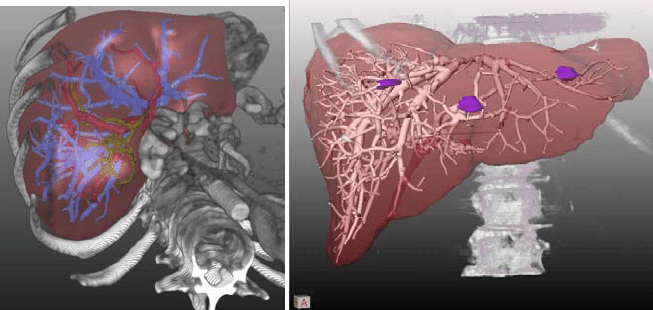

----

Idea: combine surface rendering with direct volume rendering
* the liver and the vessels inside are rendered using surfaces
* the bones are rendered using DVR

Advantages:
* difficult to render vessels, organs and bones with DVR
* compute volume of organs is possible
* display the organ and the context of the organ